# Molecular Dynamics Simulations

Previously, we simulated a Lennard Jones fluid using Monte Carlo methods. 
When performing the Monte Carlo simulation we generated potential configurations of our system using random movements of particles. The idea was to generate enough microstates at equilibrium to be able to analyze our molecular system for properties.

In this lab, we will use a different simulation method to do the same thing -namely generate potential system configurations. We will use a simulation method called **molecular dynamics** (MD). 
In molecular dynamics simulations, we simulate the movement of molecules by calculating the forces on atoms and updating their positions based on those forces.
The output of a molecular dynamics simulation is a called a trajectory and simulates the movement of particles through time.
When viewed, a trajectory is similar to a "movie" of particle movement.

## Running a Molecular Dynamics Simulation

In this lab, you will get hands on experience running and analyzing a molecular dynamics simulation.
We will simulate the same system as before - a Lennard Jones fluid.

In our previous lab, we wrote our own code for running and analyzing ouir simulation. 
This will usually not be the case!
Usually, you would use code someone else has written for these tasks, input your specific system, then analyze for results.
We will use the package [Atomic Simulation Environment](https://wiki.fysik.dtu.dk/ase/) to perform our simulation. 
ASE provides a Python interface to molecular dynamics simulations.
We will be using two other packages for analysis - [MDTraj]() and [MDAnalysis]().

<div class="alert alert-block alert-warning">
    <h3>Mathematical Equations in this Lab</h3>

This lab will show many mathematical equations to explain the theory behind molecular dynamics simulations and the calculations we are performing. However, these equations aren't the *focus* of the lab. They're provided to give you context if you are interested. The goal of the exercise is to understand the basic difference between Monte Carlo and molecular dynamics simulations and get some experience running and analyzing calculations.
    
</div>



### Protocol

The next few cells walk you through running a simulation with the `ase` package. 
After you have been walked through the steps, there are exercises for you to complete at the end of the notebook where you will 
vary your simulation parameters and compare the results.

Our simulations will follow a procedure similar to the one we followed for lab 1.
We will still have an equilibration step, but our production simulation will be done with molecular dynamics instead of Monte Carlo

Our procedure is outlined below.

### Step 1: Set System Parameters
For every simulation, system parameters such as the number of atoms, the temperature, and the box size must be defined. This defines the physical properties of the molecular system being simulated.
This step will usually involve "building" your system, or setting coordinates of the atoms.

### Step 2: Equilibration Simulation
An "equilibration simulation" is always performed to allow the system to stabilize before data collection. 
For our lab today, we will use our Monte Carlo code for an equilibration simulation. 
The equilibration will allow our system to reach the equilibrium energy value before we start the dynamics portion of our simulation.

### Step 3: Set Molecular Dynamics Parameters
For molecular dynamics, we'll switch to ASE. 
ASE does not use atomic units, so we will need to convert to real units.

Additional settings specific to the molecular dynamics simulation need to be defined. These include:
  - **Number of Steps**: This specifies the total number of simulation steps for running the MD simulation.
  - **Simulation Timestep**: This is the time interval for each MD step, defining how often atomic positions are updated.
  - **Lennard-Jones Potential Parameters**: `epsilon` (depth of the potential well) and `sigma` (distance at which the potential is zero) in **real units**.
  - **Velocities** - For molecular dynamics simulations, we will need to assign particle velocities. These will be based on our target temperature.

### Step 6: Production Simulation
Once the system is equilibrated, the production simulation is performed. 
This is the phase where data are collected, including atomic trajectories and energies.

### Step 7: Analyze the Simulation
After running the simulation, you will analyze the generated data. This can involve calculating properties such as the radial distribution function (RDF).  
Since molecular dynamics calculate time behavior of a sytem, we can also analyze time-dependent properties like diffusion coefficients.

## Returning to Monte Carlo Simulation
In the cell below, we set some simulation parameters in reduced units and perform an equilibration simulation using our Monte Carlo code.
This cell almost exactly matches the first few cells of your first lab.
The `run_simulation` function has been changed to also write XYZ files for visualization purposes.

Step Number,Energy per particle,Pressure
0, -5.610233068173349, -1.3373352493455202
10000, -5.608651980409569, -1.330614845475397
20000, -5.60697024994107, -1.3234479990590258
30000, -5.605503362761856, -1.3172405335326793
40000, -5.6027956598760635, -1.3058367774605082
50000, -5.600196039297871, -1.2949482953909426
60000, -5.600388139989807, -1.2960437884903764
70000, -5.598580760327396, -1.288461283414146
80000, -5.598442894536945, -1.2876792940786501
90000, -5.598584039168665, -1.2885087279204381
100000, -5.598300745232159, -1.2875646880588452
110000, -5.595840640816673, -1.2769360696323324
120000, -5.5958422475237395, -1.2774424823004762
130000, -5.594930119408594, -1.2741874691134634
140000, -5.59418078846472, -1.2708542015230881
150000, -5.592915869825537, -1.2658894030662606
160000, -5.593535493589631, -1.2691294081923736
170000, -5.5941981235698615, -1.272741177250372
180000, -5.594657986596707, -1.2755009717092243
190000, -5.594378659050925, -1.2750990989992466
200000, -5.5947

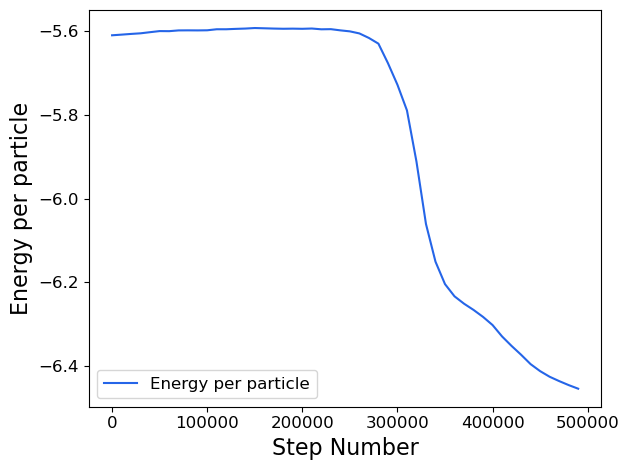

In [53]:
# This cell is from the last lab up until the equilibration run.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

# Import the needed functions from our mcsim package.
from mcsim import run_simulation, generate_cubic_lattice, generate_random_coordinates
from mcsim.analysis import time_average_rdf

# Set system parameters - you will modify this
num_atoms = 343
reduced_temperature = 0.02 #5.0 #originally 0.85
density = 0.776 #0.95 #originally 0.776

# Set simulation parameters for MC simulation
num_steps = 500000
max_displacement = 0.1 
cutoff = 3
freq = 10000

# One way to keep several different files programmatically is to use a variable file name.
# we create a variable file name using the system parameters.
# This way, you can modify your simulation notebook and rerun without fear of
# losing results you already have!
filename = f"T_{reduced_temperature}_density_{density}_nsteps_{num_steps}".replace(".", "p")

# Generate the initial configuration
atomic_coordinates, box_length = generate_cubic_lattice(num_atoms, density)

# Convert to numpy array
atomic_coordinates = np.array(atomic_coordinates)

# Run an equilibration simulation
equilibration_coords = run_simulation(deepcopy(atomic_coordinates), 
                                              box_length, cutoff, 
                                              reduced_temperature, 
                                              num_steps, freq=freq, 
                                              filename=f"data/{filename}_equilibration.csv",
                                              trajectory_file=f"data/{filename}_equilibration.xyz"
                                     )

# we will use pandas read_csv function - very commonly used in Python for data science
equil = pd.read_csv(f"data/{filename}_equilibration.csv")

## Some code for making a pretty plot with matplotlib
fig, ax = plt.subplots()
ax.plot("Step Number", "Energy per particle", data=equil, color="#2565E8")
ax.set_ylabel('Energy per particle', fontsize=16)
ax.set_xlabel('Step Number', fontsize=16)
ax.tick_params(axis="both", which="major", labelsize=12)
ax.legend(fontsize=12)
fig.tight_layout()

## Visualizing Monte Carlo

The code for equilibration had capabilities to write an XYZ trajectory added.
We can visualize the equilibration using this XYZ trajectory, Atomic Simualtion Environment, and a Python library called [NGLView](https://nglviewer.org/nglview/latest/).

After running the cell below, mouse over the image to see a player in the lower left corner. You can click this to play a movie of the equilibration.
You can also click and drag the cube to rotate the view.

If you are unable to see atoms from executing the cell below, execute the cell another time when another cell isn't running.

In [54]:
from ase.io import read, Trajectory
import nglview as nv

# Load the multi-frame XYZ file
atoms_trajectory = read(f"data/{filename}_equilibration.xyz", index=":")  # ':' loads all frames

view = nv.show_asetraj(atoms_trajectory)  # Use the ASE trajectory object
view.clear_representations()

# Adjust the visualization style
view.add_representation("spacefill", radiusScale=0.25)

# Step 4: Display the viewer
view

NGLWidget(max_frame=49)

## Molecular Dynamics

Now we will perform molecular dyanmics simulations

To start with ASE, we will use objects that are part of the library to set up our system.
When using ASE, we will explicitly set that our system contains Argon atoms. We will need to set proper values of epsilon, sigma, and the temperature as well as adjust all of our particle coordinates to be in real units.

In [55]:
from ase import Atoms
from ase.calculators.lj import LennardJones
from ase.units import kB

# ASE expects units of length to be angstrom
# units of temperature should be Kelvin
sigma = 3.405 # sigma for Ar in angstrom
epsilon_K = 120 # The table gives epsilon/kB (units K)

epsilon_eV = epsilon_K * kB  # This converts it to be in eV
temperature = epsilon_K * reduced_temperature

# Convert our equilibrated coords to be in units of angstrom
original_coords = equilibration_coords[0] * sigma
equilibrated_coords = equilibration_coords[-1] * sigma

box_length_real = box_length * sigma
print(f"The box length is {box_length_real} angstrom. The temperature is {temperature}.")

The box length is 25.93748816209773 angstrom. The temperature is 2.4.


### Molecular Dynamics Background

**Execute the next two code cells and read this while they are running**

The Monte Carlo simulations we have done so far depend on being able to write an equation for the potential energy of the system. For our Lennard Jones fluid, the pairwise sum of the Lennard Jones particles is our potential energy function, though the equation is more complicated for more complicated systems. When performing molecular dynamics simulation, we also rely on the fact that force is equal to the negative gradient of potential energy. 
MD simulations use a potential energy function and Newton's second law (the force on an object is equal to the object's mass times its acceleration) to calculate positions of atoms. 

$$ \vec{F} = - \nabla U $$

$$ \vec{F} = m \cdot \vec{a} = m \cdot \frac{d\vec{v}}{dt} = m \cdot \frac{d^{2}\vec{r}}{dt^{2}}$$

Looking at these two equations, we see that we we already know the mass for each atom. We can use the LJ equation calculate the force on each atom. The net force on each atom is the sum of forces from all other atoms in the system:

$$ \vec{F}_i = \sum_{j=1}^{n_{max}}{f_{j}}, (j \neq i) $$

This means that we should be able to update positions for each atom based on the force field function, the positions of other atoms in the system, and mass of the molecule. 

$$ \vec{a}_{i}(t_{0}) = \frac{1}{m}\vec{F}_{i}(t_{0}) = -\frac{1}{m}_{i}(\nabla U)_{i} $$

We know that we can calculate positions ($\vec{x}$) based on previous positions and acceleration and an amount of time ($\Delta t$)

$$\vec{x}_i (t_{0} + \Delta t) = \vec{x}_i (t_{0}) + \vec{v}_{i} (t_{0}) \Delta t + \frac{1}{2} \vec{a}_{i}(t_{0}) \Delta t^{2} $$

This is the general approach to molecular dynamics. You have some atoms which have initial positions and velocities when you start your simulation. You can use these positions to calculate the potential energy and the forces on each atom (because force is the negative gradient of potential energy). With the velocities of the atoms, you can calculate new positions. This process is repeated over and over again, and each iteration is typically called a **timestep**. 

The typical time step size ($\Delta t$) represents 1 femtosecond of time and is based on X-H bond vibration frequencies. 
A timestep that is too small will lead to an inefficient simulation, while a time step that is too large will be inaccurate or cause your simulation to fail. Often, we will constrain hydrogen in a simulation and can use a longer timestep of 2 femtoseconds. 
MD simulations assumes that the [Erogodic hypothesis](https://en.wikipedia.org/wiki/Ergodic_hypothesis) is true, meaning that the time average calculated from the simulation is equal to the ensemble average. 
For this to be true, the simulation has to sample many conformations. 
Most simulations have millions to trillions of time steps.

There are different algorithms for performing time steps in molecular dynamics simulations.
These algorithms are called "integrators" because they integrate Newton's equations of motion.
You will learn more in-depth about these for **Problem Set 2**.
In this lab, we will use an integrator called Velocity Verlet.

In the cell below, we create our system for ASE by using the ASE `Atoms` object to prepare to perform a molecular dynamics simulation using ASE.

In [56]:
# Step 1: Import Required Packages

import sys

import matplotlib.pyplot as plt

# Atomic Simualtion Environment imports
from ase import Atoms 
from ase.calculators.lj import LennardJones
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.md.verlet import VelocityVerlet
from ase.io import Trajectory, write
from ase.units import fs
from ase.md import MDLogger

# Create ASE atoms object
atoms = Atoms('Ar' * num_atoms, positions=equilibrated_coords)

# Set the simulation box and enable periodic boundary conditions (PBC)
atoms.set_cell([box_length_real, box_length_real, box_length_real])  # Set the simulation box size in reduced units
atoms.set_pbc(True)  # Enable periodic boundary conditions

# Set up the Lennard-Jones potential with cutoff of 3*sigma
lj_calculator = LennardJones(epsilon=epsilon_eV, sigma=sigma, rc=3*sigma)
atoms.calc = lj_calculator

write(f"data/{filename}_real.pdb", atoms) # write a PDB file
atoms

Atoms(symbols='Ar343', pbc=True, cell=[25.93748816209773, 25.93748816209773, 25.93748816209773], calculator=LennardJones(...))

Our MC simulation was run under conditions of constant number of particles, constant box volume, and constant temperature.
The energy was allowed to fluctuate so that our system of particles could reach its equilibrium for the simulation conditions.

Now that we are at equilibrium energy, we will switch to a molecular dynamics simulation with constant number of particle (N), constant volume (V), and constant energy (E).
NVE is the simplest type of molecular dynamics simulation we can perform, so that's why we're starting with it here.

**If you are waiting for this to run (it may take a few minutes), go to the "questions" section at the end and start with the first few questions.**

<div class="alert alert-block alert-info"> 
<h3>How long does it take to run MD simulations?</h3>

The cells below will set up and run a molecular dynamics simulation 250 Argon atoms.
Each step in the molecular dynamics algorithm will represent approximately 1 femtosecond (1E-15) of "real time",
with our simulation running for 10,000 iterations, representing the movement of the atoms over a period of 10 picoseconds (1E-11 seconds).
This calculation will take a few minutes.

We are running a very small calculation on our laptops.
This particular calculation may be slow because of reasons related to the programming or language where the calculations are implemented.
However, it is not unusual for research-grade molecular dynamics calculations to take weeks of time of high-performance computing (HPC) clusters.
    
</div>



In [57]:
# set initial velocities based on the target temperature using a Maxwell Boltzmann Distribution
MaxwellBoltzmannDistribution(atoms, temperature_K=temperature)

# set up the Velocity Verlet integrator for NVE simulation
timestep = 4.0 * fs  # Timestep in femtoseconds
dyn_prod = VelocityVerlet(atoms, timestep)

# set up a trajectory file to save atomic positions during the production phase
output_traj = f"data/{filename}_nve.traj"
traj = Trajectory(output_traj, 'w', atoms)

# attach the trajectory writer to save atomic positions every 25 steps
dyn_prod.attach(traj.write, interval=25)

# attach ASE's MDLogger for printing progress (including energy) to stdout
md_logger_prod = MDLogger(dyn_prod, atoms, sys.stdout, header=True, stress=False, peratom=False)
dyn_prod.attach(md_logger_prod, interval=25)

# run the NVE production simulation
production_steps = 1250  # Number of MD steps for the production run - this will represent 5 picoseconds
print("Running NVE production simulation...")
dyn_prod.run(production_steps)
print("Production simulation complete. Trajectory saved to:", output_traj)


Time[ps]      Etot[eV]     Epot[eV]     Ekin[eV]    T[K]
Running NVE production simulation...
0.0000          -21.077      -21.174        0.097     2.2
0.1000          -21.077      -21.186        0.109     2.5
0.2000          -21.077      -21.216        0.139     3.1
0.3000          -21.077      -21.238        0.161     3.6
0.4000          -21.077      -21.250        0.173     3.9
0.5000          -21.077      -21.264        0.187     4.2
0.6000          -21.077      -21.291        0.214     4.8
0.7000          -21.077      -21.325        0.248     5.6
0.8000          -21.077      -21.354        0.277     6.3
0.9000          -21.077      -21.384        0.307     6.9
1.0000          -21.077      -21.406        0.329     7.4
1.1000          -21.077      -21.417        0.340     7.7
1.2000          -21.077      -21.436        0.359     8.1
1.3000          -21.077      -21.461        0.384     8.7
1.4000          -21.077      -21.476        0.399     9.0
1.5000          -21.077      -21.483

### Visualizing the MD Simulation

We can again use NGLView to visualize our system. 

Unlike the Monte Carlo simulation where we only sampled independent configurations,
molecular dynamics generates a continuous trajectory through time. 
The visualization now looks like a “movie” of particles evolving step by step under Newton’s equations of motion.

In [58]:
# Step 1: Load the ASE trajectory
traj = Trajectory(output_traj)

# Step 2: Create an NGLView structure from ASE atoms
view = nv.show_asetraj(traj)  # Directly visualize the ASE trajectory
view.clear_representations()

# Step 3: Adjust the visualization style (optional)
view.add_representation("spacefill")
view.add_unitcell() 

# Step 4: Display the viewer
view

NGLWidget(max_frame=50)

## Analyzing our MD Simulation

### Radial Distribution Function
We'll perform the RDF analysis. However, this time, we will use MDTraj to do the computation.

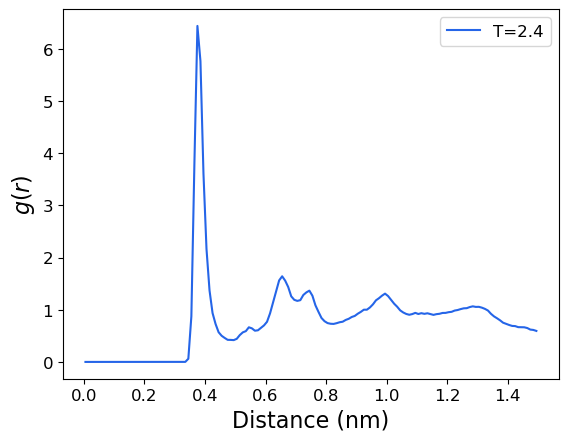

In [59]:
import mdtraj as md
import matplotlib.pyplot as plt

from ase.io import write

# this is an intermediate file so we won't keep it with a unique name
write("data/nve_trajectory.pdb", traj)

md_traj = md.load('data/nve_trajectory.pdb', top=f"data/{filename}_real.pdb")

# Step 2: Define atom pairs for RDF calculation
argon_pairs = md_traj.topology.select_pairs('name Ar', 'name Ar')

# Step 3: Compute the RDF - MDTraj uses nanometers as default length units.
rdf_r, rdf_value = md.compute_rdf(md_traj, pairs=argon_pairs, r_range=(0.0, 1.5), bin_width=0.01, periodic=True)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(rdf_r, rdf_value, label=rf'T={temperature}', color="#2565E8")

ax.set_ylabel(r'$g(r)$', fontsize=16)
ax.set_xlabel(r'Distance (nm)', fontsize=16)

ax.tick_params(axis="both", which="major", labelsize=12)
ax.legend(fontsize=12)

### Measuring Diffusion Coefficient

Because molecular dynamics simulate time dependent behavior of our system, we can now simulate time-dependent properties.
The diffusion coefficient \(D\) can be calculated using the **Einstein relation**, which relates the **Mean Squared Displacement (MSD)** of particles to the diffusion coefficient.

The MSD is defined as the average of the squared displacements of particles over time:

$$
\text{MSD}(t) = \left\langle |\vec{r}_i(t) - \vec{r}_i(0)|^2 \right\rangle
$$

Where:
- $ \vec{r}_i(t) $ is the position of particle \(i\) at time \(t\),
- $ \vec{r}_i(0) $ is the initial position of particle \(i\) at time \(0\),
- The angle brackets $ \left\langle \cdot \right\rangle $ represent the average over all particles in the system.

In a 3D system, the **Einstein relation** links the diffusion coefficient \(D\) to the MSD through the equation:

$$
D = \frac{1}{6} \lim_{t \to \infty} \frac{\text{MSD}(t)}{t}
$$

Where:
- $D$ is the diffusion coefficient,
- $\frac{\text{MSD}(t)}{t}$ is the slope of the MSD vs. time plot at long times,
- The factor of 6 comes from the dimensionality of the system (3 dimensions).

To compute the diffusion coefficient, we typically:
1. Run a molecular dynamics simulation and track the positions of particles over time.
2. Calculate the MSD as a function of time.
3. Fit a line to the MSD vs. time data at long times.
4. The slope of this line is proportional to the diffusion coefficient:
   $$
   D = \frac{\text{slope of MSD vs. time}}{6}
   $$

This process provides the diffusion coefficient in units of $\text{length}^2/\text{time}$ (e.g., $\text{Å}^2/\text{ps}$).
The cell below completes this process for our trajectory using [a special module in MDAnalysis](https://docs.mdanalysis.org/stable/documentation_pages/analysis/msd.html). 


In [60]:
import MDAnalysis as mda
import MDAnalysis.analysis.msd as msd

u = mda.Universe(f"data/{filename}_real.pdb", "data/nve_trajectory.pdb", dt=0.1)# frames are 100 fs (0.1 ps) apart
MSD = msd.EinsteinMSD(u, select='all', msd_type='xyz', fft=True)
MSD.run()

100%|████████████████████████████████████████████████████████████| 343/343 [00:00<00:00, 858.00it/s]


In [64]:
msd =  MSD.results.timeseries

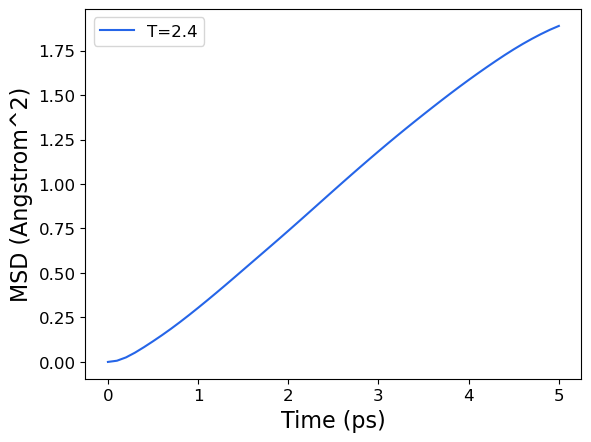

In [62]:
nframes = MSD.n_frames
timestep = 0.1 # each frame is separated by 0.1 ps
lagtimes = np.arange(nframes)*timestep # make the lag-time axis

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(lagtimes, msd, label=rf'T={temperature}', color="#2565E8")

ax.set_ylabel(r'MSD (Angstrom^2)', fontsize=16)
ax.set_xlabel(r'Time (ps)', fontsize=16)

ax.tick_params(axis="both", which="major", labelsize=12)
ax.legend(fontsize=12)

In [63]:
from scipy.stats import linregress

# only want to fit the end - this get us a number that is approximately 20% of our total number of frames
num_frames = len(msd)
analyze_frames = int(num_frames*0.2)

# use negative indexing to get the last analyze_frames number of frames.
linear_model = linregress(lagtimes[-analyze_frames:], msd[-analyze_frames:])
slope = linear_model.slope
error = linear_model.stderr

# dim_fac is 3 as we computed a 3D msd with 'xyz'
D = slope * 1/(2*MSD.dim_fac)

print(f"The calculated self-diffusion coefficient is {D} angstrom^2/ps")

The calculated self-diffusion coefficient is 0.04985255139248873 angstrom^2/ps


Similar to our work in Chem 280, we can compare our results to [benchmarks reported by NIST]()

These are repeated below with the Diffusion Coefficient converted to real units. 
Does your diffusion coefficient from simulation match or come close?

|    T* |    ρ* |     U* |    p* |    D* |   D (Å^2/ps) |
|------:|------:|-------:|------:|------:|-------------:|
| 0.851 | 0.776 | -5.517 | 0.030 | 0.061 |        0.328 |
| 0.853 | 0.780 | -5.533 | 0.072 | 0.063 |        0.339 |
| 0.852 | 0.820 | -5.803 | 0.573 | 0.048 |        0.258 |
| 0.851 | 0.840 | -5.909 | 0.910 | 0.042 |        0.226 |
| 0.849 | 0.860 | -6.027 | 1.282 | 0.035 |        0.188 |
| 0.851 | 0.900 | -6.234 | 2.544 | 0.027 |        0.145 |


## Questions

### Programming Questions

1. View the [ASE repository](https://gitlab.com/ase/ase) on GitLab and take a look at the [repository analytics](https://gitlab.com/ase/ase/-/graphs/master/charts). What language is ASE written in?
2. ASE uses many objects for calculations. Using the notebook cell with ASE imports, identify all of the classes we imported from ASE. 
3. In our calculation we used an [ASE calculator](https://wiki.fysik.dtu.dk/ase/ase/calculators/calculators.html) for Lennard Jones. [View the source code for the calculator](https://gitlab.com/ase/ase/-/blob/master/ase/calculators/lj.py?ref_type=heads#L8). Looking at the class definition and constructor, identify concepts we've covered in our course such as methods, attributes, and inheritance. Take note of any syntax or content you don't yet understand in the class. As you look at the class, think about:
    * How does the design of the Lennard-Jones calculator class demonstrate the principles of encapsulation or modularity?
    * What are the advantages of using inheritance in the design of molecular simulation calculators?
5. Pick one other class to examine and find it in the source code of the ASE repository (an IDE should be able to help you with this). Perform the same exercise as above.

### Molecular Dynamics Exercises

1. Change the system density to another value (the density is ρ*, second column) in the table and compare the observed diffusion coefficient.
1. Decrease the reduced density of the system to `0.009`. Does this affect how long you need to run equilibration? (You should see energy level off in equilibration before moving on to MD). Doesstarting with a random initial configuration help with equilibration? Make a hypothesis about the observed differences.
2. After equilibrating the system from (1), run MD. How does the different density affect your calculated properties like RDF or diffusion coefficient?
3. Run a simulation at a higher or lower temperature and compare your results.
4. Use [this talble of LJ parameters](https://onlinelibrary.wiley.com/doi/pdf/10.1002/9783527676750.app5) to pick another substance to simulate. This will be easiest with atomic substances, as you will have to change sigma, epsilon, and the atom type passed to ASE (see the cell where we create the ASE Atoms object). If you are feeling **very** ambitious, you may try to simulate an LJ fluid for one of the molecules listed. You would still use the Lennard Jones calculator for this, but would likely need to figure out how to set the correct mass for the molecule.

In [7]:
#PQ
#1) ASE is written in pythonic language
#2) We import the class Atoms from ASE. We also import the following objects:
#from ase.calculators.lj import LennardJones
#from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
#from ase.md.verlet import VelocityVerlet
#from ase.io import Trajectory, write
#from ase.units import fs
#from ase.md import MDLogger

#3) Class Attribute:
    implemented_properties = ['energy', 'energies', 'forces', 'free_energy']
    implemented_properties += ['stress', 'stresses']  # bulk properties
    default_parameters = {
        'epsilon': 1.0,
        'sigma': 1.0,
        'rc': None,
        'ro': None,
        'smooth': False,
    }
    nolabel = True
# Default constructor with instance attributes:
def __init__(self, **kwargs):
        Calculator.__init__(self, **kwargs)

        if self.parameters.rc is None:
            self.parameters.rc = 3 * self.parameters.sigma

        if self.parameters.ro is None:
            self.parameters.ro = 0.66 * self.parameters.rc

        self.nl = None
# The rest of the functions are the methods.
#3) continued: We can see encapsulation/modularity within the Lennard-Jones calculator class throughout several of the function since it groups together relative parameters.
# For example: 
        sigma = self.parameters.sigma
        epsilon = self.parameters.epsilon
        rc = self.parameters.rc
        ro = self.parameters.ro
        smooth = self.parameters.smooth
# We used a similar approach in class for our atom class for data like number of protons, neutrons, and electrons.
#3) Continued: inheritance is important for the reproducibility of our function and given state of our system. It also helps with updating the function/system cumulatively
# so we don't lose our progress.
#4) ...



IndentationError: unexpected indent (3936925357.py, line 12)

In [29]:
#MDE
#1) Originally we had 0.38 angstrom^2/ps for our diffusion coefficient when we had a density of 0.776. When we change our density to 0.95, we get a new diffusion coefficient of
# 0.19164764910683374 angstrom^2/ps.
#2) The energy per particle and pressure are both much smaller for a density of 0.0009 compared to what we saw for a density of 0.776 when we look at the equilibration simulation.
#2) Our hypothesis is that the equilibration should be more or less the same sincce we will still be intaking the same parameter for density. Thus if we did use a random number
# generator for the initial configuration, we would still be seeing similar numbers for the output for the energy and diffusion coefficient since there interactions should still
#be more or less the same.
#3) Increasing the density ended up decreasing the diffusion coefficient (p = 0.95, D = 0.19). When we have a really small density, we get a much larger diffusion coefficient.
# (p = 0.0009, D = 9.95)
#4) Orginally D=0.38 at 0.85 reduced temp (and 0.776 for p). At reduced temp = 5.0, we  D =got 2.0216924677983608 angstrom^2/ps. At 0.02 reduced temp, we get 
# D= 0.04985255139248873 angstrom^2/ps.
#5)